In [45]:
import wave
import json
import librosa
import csv
import numpy as np
from pywt import wavedec
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [46]:
model_uri = '../modelh5/model_cnn_tuning.h5'
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 110, 64)           256       
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 55, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_9 (Conv1D)           (None, 53, 32)            6176      
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 27, 32)            0         
 g1D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 864)               0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [47]:
# import wave
# import json
# header = 'filename'
# for i in range(1, 41):
#     header += f' mfcc{i}'
# for i in range(1, 13):
#   header += f' chroma{i}'
# for i in range(1, 61):
#   header += f' cqt{i}'
# header += ' label'
# header = header.split()
# file = open('testing.csv', 'w', newline='')
# with file:
#     writer = csv.writer(file)
#     writer.writerow(header)



In [48]:
# dataset_path = '../data/testing_10/'

In [49]:
# for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
#         # ensure we're processing a genre sub-folder level
#         if dirpath is not dataset_path:
#             semantic_label = dirpath.split("/")[-1]
#             print("\nProcessing: {}".format(semantic_label))
#             for f in filenames:
#                 file_path = os.path.join(dirpath, f)
#                 to_append = f'{file_path}'
#                 # print(file_path)
#                 y, sr = librosa.load(file_path, mono=True, duration=3, sr=8000)
#                 coeffs = wavedec(y, 'db1', level=10)
#                 cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
#                 mfcc = librosa.feature.mfcc(y=cD1, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
#                 rms = librosa.feature.chroma_stft(y=cD1, sr=8000)
#                 cqt = np.abs(librosa.cqt(y=cD1, sr=sr, n_bins=60))
#                 combined_features = np.concatenate((mfcc, rms, cqt), axis=0)
#                 to_append = f'{file_path}'
#                 for e in combined_features:
#                     to_append += f' {np.mean(e.T, axis=0)}'
#                 to_append += f' {semantic_label}'
#                 file = open('testing.csv', 'a', newline='')
#                 with file:
#                     writer = csv.writer(file)
#                     writer.writerow(to_append.split())




In [50]:
data = pd.read_csv('./testing.csv')
data.head()

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/testing_10/MVP/New_MVP_135.wav,-409.528564,87.384094,26.037184,-19.667170,-30.942360,-22.674948,-22.804028,-23.051409,-34.245644,...,0.002009,0.001601,0.001465,0.001038,0.000982,0.000833,0.000616,0.000510,0.000491,MVP
1,../data/testing_10/MVP/New_MVP_192.wav,-337.002411,89.271080,14.186399,1.686405,-6.657608,-13.926779,-20.226974,-19.441204,-17.915880,...,0.002848,0.002626,0.003480,0.003186,0.003180,0.002202,0.001917,0.002559,0.002665,MVP
2,../data/testing_10/MVP/New_MVP_179.wav,-407.230621,70.930885,-13.684482,-34.369339,-21.889259,-15.245199,-11.328670,-9.168187,-16.146969,...,0.004742,0.004964,0.003947,0.003980,0.003126,0.003334,0.002728,0.002642,0.002220,MVP
3,../data/testing_10/MVP/New_MVP_165.wav,-406.872314,84.138229,27.318718,-15.585702,-28.959631,-22.787647,-22.402174,-23.848078,-31.116653,...,0.003096,0.002835,0.002835,0.002727,0.002162,0.001437,0.000839,0.000807,0.000667,MVP
4,../data/testing_10/MVP/New_MVP_024.wav,-479.023804,89.486000,8.549840,-0.640211,-7.605422,-15.150332,-16.487503,-13.620892,-10.753409,...,0.002732,0.001242,0.000721,0.001375,0.002052,0.002141,0.001541,0.000922,0.001057,MVP


In [51]:
X = data.drop(['label', 'filename'], axis=1)
y = data.iloc[:, -1]

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model = tf.keras.models.load_model(model_uri)
pred = model.predict(X)
hasil = []
class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
# class_labels = ['MVP', 'MS', 'N', 'MR', 'AS']
for i in pred:
    # hasil.append(np.argmax(i))
    print('===')
    print(i)
    cek = np.argmax(i)
    print(f'Actual class: {cek}')
    print(f'Predicted class: {class_labels[cek]}')
    print('===')
    hasil.append(class_labels[cek])
y_p = np.argmax(pred, axis=1)


4/4 [==============================] - 0s 2ms/step
===
[6.6234286e-05 1.6444031e-04 4.5617048e-06 9.9976468e-01 1.4474205e-07]
Actual class: 3
Predicted class: MVP
===
===
[0.32825854 0.14834814 0.37342292 0.13955042 0.01041998]
Actual class: 2
Predicted class: MS
===
===
[5.1784432e-01 6.5765209e-02 1.0280983e-03 4.1528854e-01 7.3903022e-05]
Actual class: 0
Predicted class: AS
===
===
[2.8037722e-04 3.7579890e-04 5.7653137e-06 9.9933749e-01 5.9603258e-07]
Actual class: 3
Predicted class: MVP
===
===
[0.00211682 0.00903245 0.0127216  0.5543937  0.42173544]
Actual class: 3
Predicted class: MVP
===
===
[1.2993907e-05 2.2838665e-05 7.3286860e-06 9.9995607e-01 7.5711546e-07]
Actual class: 3
Predicted class: MVP
===
===
[4.6547771e-02 2.3507553e-06 2.8788082e-03 9.4873285e-01 1.8382301e-03]
Actual class: 3
Predicted class: MVP
===
===
[2.7397977e-05 3.5032055e-05 2.5888021e-06 9.9993485e-01 1.7768336e-07]
Actual class: 3
Predicted class: MVP
===
===
[0.00527802 0.00240104 0.05715003 0.87208

In [53]:
cm = confusion_matrix(y, hasil)
cm

array([[20,  0,  0,  0,  0],
       [ 2, 17,  0,  0,  1],
       [ 3,  0, 16,  1,  0],
       [ 1,  1,  1, 17,  0],
       [ 0,  0,  0,  0, 20]])

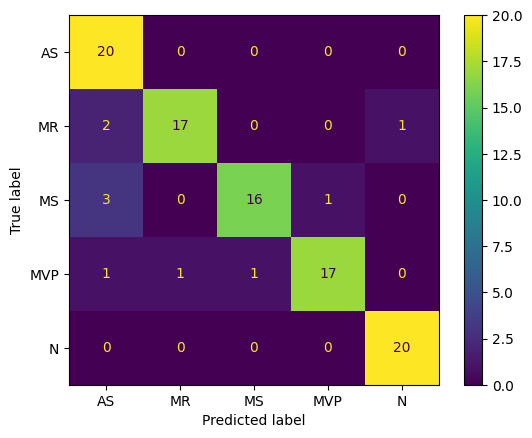

In [54]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AS', 'MR', 'MS', 'MVP', 'N'])
disp.plot()
plt.show()

In [55]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [56]:
print("Sensitivity :" , TPR, 'mean: ', np.mean(TPR))
print("Specificity :" , TNR, 'mean: ', np.mean(TNR))
print("Precision :" , PPV, 'mean: ', np.mean(PPV))
print("Accuracy :" , ACC, 'mean: ', np.mean(ACC))
print("FPR :" , FPR, 'mean: ', np.mean(FPR))
print("FNR :" , FNR, 'mean: ', np.mean(FNR))
print("NPV :" , NPV, 'mean: ', np.mean(NPV))
print("FDR :" , FDR, 'mean: ', np.mean(FDR))
print("f1_score:", 2 * (PPV * TPR) / (PPV + TPR), 'mean: ', np.mean(2 * (PPV * TPR) / (PPV + TPR)))

Sensitivity : [1.   0.85 0.8  0.85 1.  ] mean:  0.9
Specificity : [0.925  0.9875 0.9875 0.9875 0.9875] mean:  0.975
Precision : [0.76923077 0.94444444 0.94117647 0.94444444 0.95238095] mean:  0.9103354162177693
Accuracy : [0.94 0.96 0.95 0.96 0.99] mean:  0.96
FPR : [0.075  0.0125 0.0125 0.0125 0.0125] mean:  0.024999999999999998
FNR : [0.   0.15 0.2  0.15 0.  ] mean:  0.1
NPV : [1.         0.96341463 0.95180723 0.96341463 1.        ] mean:  0.9757272994416691
FDR : [0.23076923 0.05555556 0.05882353 0.05555556 0.04761905] mean:  0.08966458378223084
f1_score: [0.86956522 0.89473684 0.86486486 0.89473684 0.97560976] mean:  0.8999027045128514
